In [1]:
import ultraplot as uplt
import pandas as pd

In [18]:
df = pd.read_csv('../data/preprocess-results.csv')
df.index = [str(c).zfill(3) + '_' + s for c, s in zip(df['case_number'], df['satellite'])]

In [19]:
df

,case_number,satellite,init_ice_mean,init_ice_stdv,init_bdry_mean,init_bdry_stdv,proc_ice_mean,proc_ice_stdv,proc_bdry_mean,proc_bdry_stdv,morph_ice_mean,morph_ice_stdv,morph_bdry_mean,morph_bdry_stdv
001_terra,1,terra,0.715132,0.067195,0.600921,0.143565,0.814642,0.111481,0.600356,0.213379,0.815718,0.110569,0.603478,0.210772
001_aqua,1,aqua,0.721311,0.082272,0.575663,0.164311,0.832571,0.116405,0.604364,0.251251,0.833143,0.115560,0.612441,0.242701
004_terra,4,terra,0.679108,0.103277,0.564121,0.140670,0.733959,0.153721,0.557434,0.225312,0.748665,0.126466,0.611421,0.181055
004_aqua,4,aqua,0.680141,0.049639,0.632109,0.083017,0.686989,0.123893,0.557636,0.186448,0.704535,0.107049,0.601426,0.164120
005_terra,5,terra,0.743910,0.052974,0.695090,0.109959,0.778757,0.074214,0.691277,0.204917,0.783903,0.055946,0.730836,0.152518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186_aqua,186,aqua,0.841981,0.047216,0.794749,0.094612,0.831971,0.085174,0.759239,0.168246,0.834096,0.079735,0.775923,0.135694
188_aqua,188,aqua,0.821911,0.027447,0.800706,0.036764,0.834680,0.019744,0.816290,0.031413,0.834843,0.019611,0.817630,0.029181
188_terra,188,terra,0.731645,0.035812,0.684908,0.058459,0.736615,0.085266,0.618430,0.138871,0.736743,0.085295,0.621074,0.135691
189_aqua,189,aqua,0.846362,0.040666,0.790448,0.099097,0.851355,0.042511,0.780923,0.167107,0.852955,0.038558,0.800423,0.143894


In [9]:
# Get test/train index data
df_testtrain = pd.read_csv('../data/validation_dataset_testtrain_split.csv', index_col=0).rename({'Unnamed: 0': 'case'}, axis=1)

In [21]:
training_idx = df_testtrain.loc[df_testtrain.training & (df_testtrain.visible_floes == 'yes')].index

In [23]:
df_train = df.loc[training_idx, :]

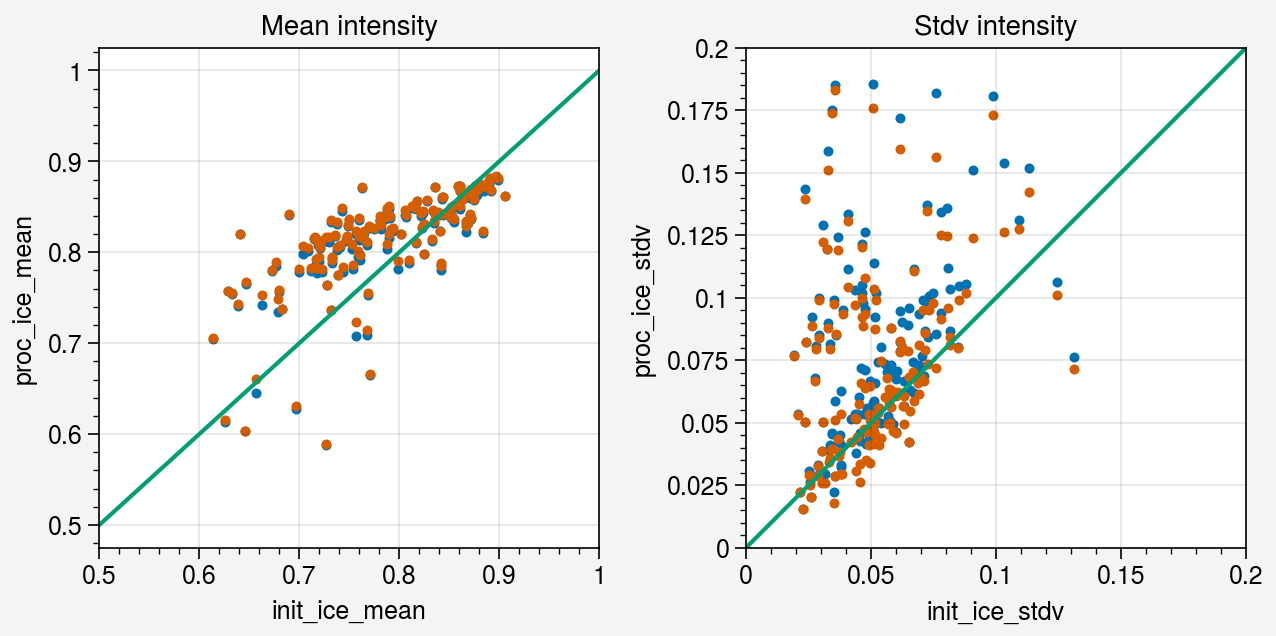

In [32]:
fig, axs = uplt.subplots(ncols=2, share=False, aspect=1)
ax = axs[0]
ax.scatter(df_train.init_ice_mean, df_train.proc_ice_mean, marker='.', label='Enhanced Gray')
ax.scatter(df_train.init_ice_mean, df_train.morph_ice_mean, marker='.', label='Reconstruction')
ax.plot([0.5, 1], [0.5, 1])
ax.format(title='Mean intensity')

ax = axs[1]
ax.scatter(df_train.init_ice_stdv, df_train.proc_ice_stdv, marker='.', label='Enhanced Gray')
ax.scatter(df_train.init_ice_stdv, df_train.morph_ice_stdv, marker='.', label='Reconstruction')
ax.plot([0, 0.2], [0, 0.2])
ax.format(title='Stdv intensity', ylim=(0, 0.2), xlim=(0, 0.2))

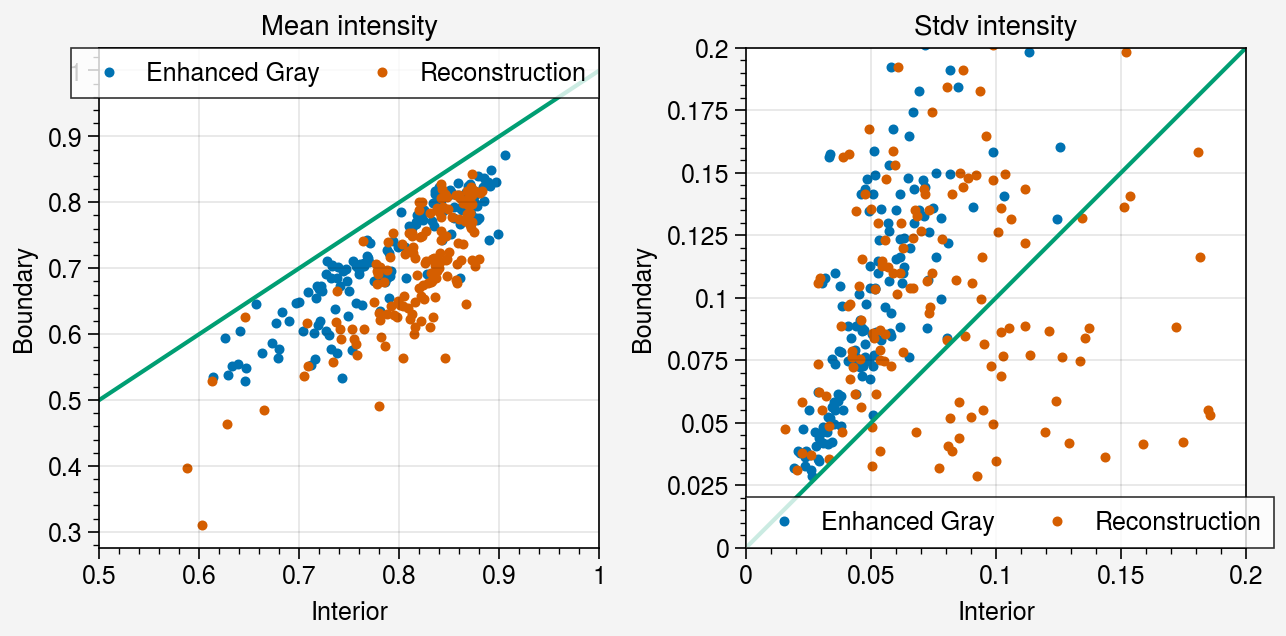

In [38]:
fig, axs = uplt.subplots(ncols=2, share=False, aspect=1)
ax = axs[0]
ax.scatter(df_train.init_ice_mean, df_train.init_bdry_mean, marker='.', label='Enhanced Gray')
ax.scatter(df_train.proc_ice_mean, df_train.proc_bdry_mean, marker='.', label='Reconstruction')
ax.plot([0.5, 1], [0.5, 1])
ax.format(title='Mean intensity', xlabel='Interior', ylabel='Boundary')
ax.legend()

ax = axs[1]
ax.scatter(df_train.init_ice_stdv, df_train.init_bdry_stdv, marker='.', label='Enhanced Gray')
ax.scatter(df_train.proc_ice_stdv, df_train.init_bdry_stdv, marker='.', label='Reconstruction')
ax.plot([0, 0.2], [0, 0.2])
ax.format(title='Standard Deviation', ylim=(0, 0.2), xlim=(0, 0.2), xlabel='Interior', ylabel='Boundary')
ax.legend()

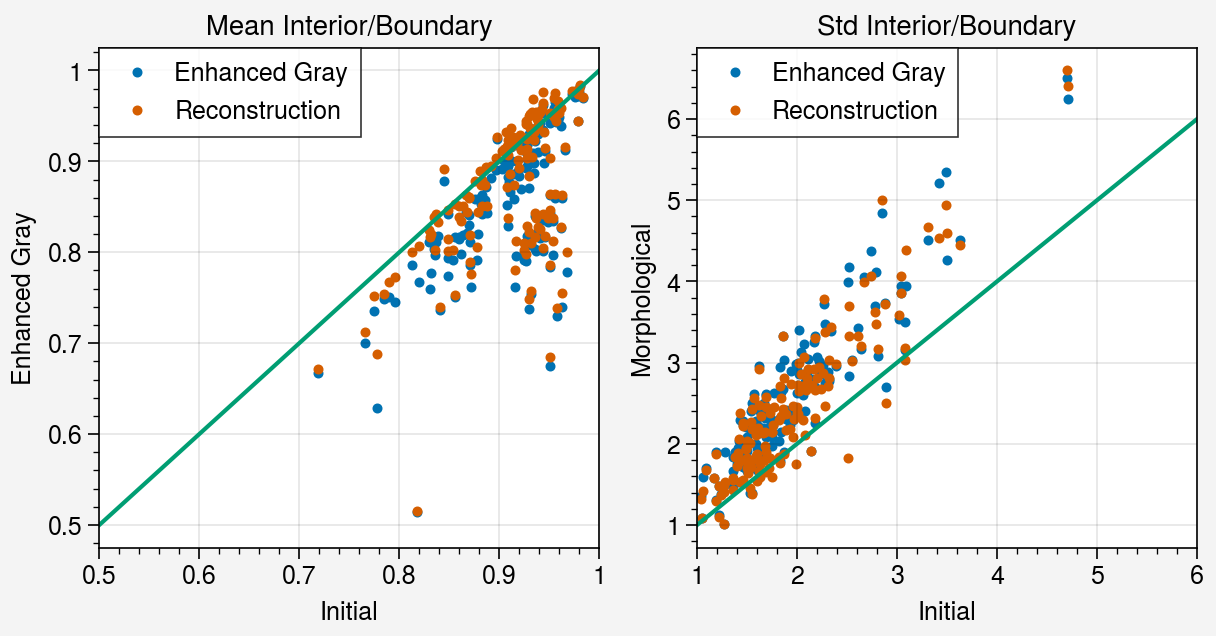

In [50]:
fig, axs = uplt.subplots(ncols=2, share=False, aspect=1)
ax = axs[0]
ax.scatter(df_train.init_bdry_mean/df_train.init_ice_mean, df_train.proc_bdry_mean/df_train.proc_ice_mean, marker='.', label='Enhanced Gray')
ax.scatter(df_train.init_bdry_mean/df_train.init_ice_mean, df_train.morph_bdry_mean/df_train.morph_ice_mean, marker='.', label='Reconstruction')

ax.format(title='Mean Interior/Boundary', xlabel='Initial', ylabel='Enhanced Gray')
ax.legend(ncols=1, loc='ul')
ax.plot([0.5,1], [0.5, 1])
ax = axs[1]
ax.scatter(df_train.init_bdry_stdv/df_train.init_ice_stdv, df_train.proc_bdry_stdv/df_train.proc_ice_stdv,
           marker='.', label='Enhanced Gray')
ax.scatter(df_train.init_bdry_stdv/df_train.init_ice_stdv, df_train.morph_bdry_stdv/df_train.morph_ice_stdv,
           marker='.', label='Reconstruction')

ax.plot([1,6], [1, 6])
ax.format(title='Std Interior/Boundary', xlabel='Initial', ylabel='Morphological')
ax.legend(ncols=1, loc='ul')

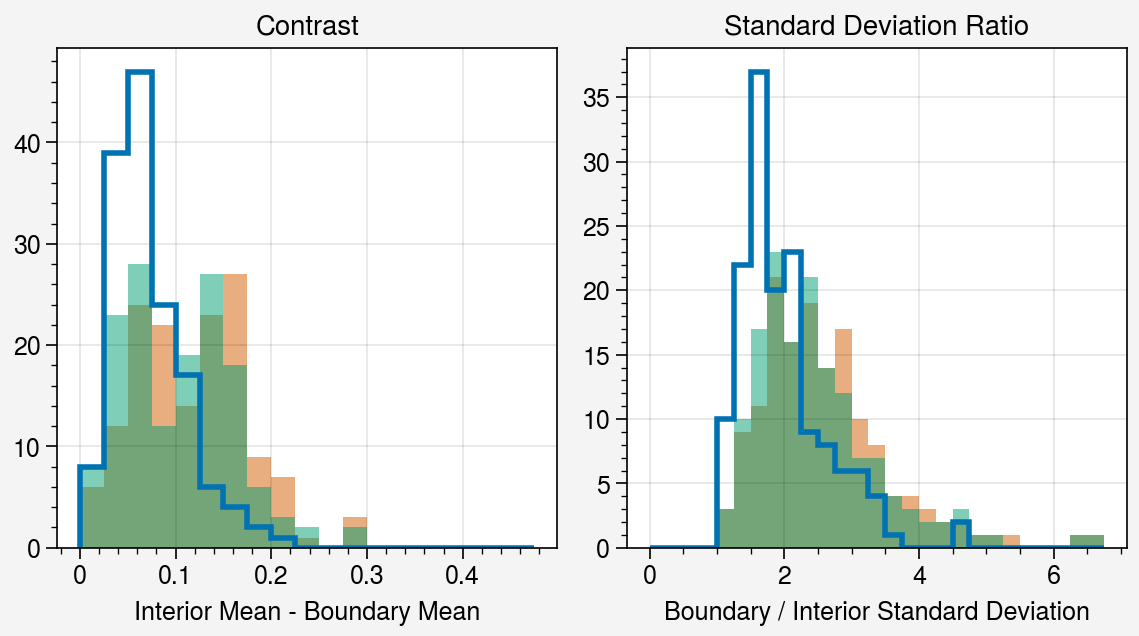

In [76]:
import numpy as np

fig, axs = uplt.subplots(ncols=2, share=False)

ax = axs[0]
bins = np.arange(0, 0.5, 0.025)
ax.hist(df_train['init_ice_mean'] - df_train['init_bdry_mean'], alpha=1, bins=bins, histtype='step', lw=2)
ax.hist(df_train['proc_ice_mean'] - df_train['proc_bdry_mean'], alpha=0.5, bins=bins)
ax.hist(df_train['morph_ice_mean'] - df_train['morph_bdry_mean'], alpha=0.5, bins=bins)
ax.format(xlabel='Interior Mean - Boundary Mean', title='Contrast')

ax = axs[1]
bins = np.arange(0, 7, 0.25)
ax.hist(df_train['init_bdry_stdv'] / df_train['init_ice_stdv'], alpha=1, bins=bins, histtype='step', lw=2)
ax.hist(df_train['proc_bdry_stdv'] / df_train['proc_ice_stdv'], alpha=0.5, bins=bins)
ax.hist(df_train['morph_bdry_stdv'] / df_train['morph_ice_stdv'], alpha=0.5, bins=bins)
ax.format(xlabel='Boundary / Interior Standard Deviation', title='Standard Deviation Ratio')

In [74]:
df_train.loc[df_train.morph_bdry_stdv - df_train.init_bdry_stdv < 0]

,case_number,satellite,init_ice_mean,init_ice_stdv,init_bdry_mean,init_bdry_stdv,proc_ice_mean,proc_ice_stdv,proc_bdry_mean,proc_bdry_stdv,morph_ice_mean,morph_ice_stdv,morph_bdry_mean,morph_bdry_stdv
015_aqua,15,aqua,0.689831,0.059956,0.619412,0.115506,0.841425,0.046319,0.777795,0.103244,0.842336,0.045779,0.780508,0.100078
018_terra,18,terra,0.762950,0.131157,0.644276,0.212424,0.870911,0.076406,0.764912,0.225799,0.872215,0.071678,0.778023,0.209110
021_aqua,21,aqua,0.823719,0.045394,0.773570,0.072321,0.843330,0.042839,0.792823,0.097914,0.845166,0.033442,0.806102,0.070594
025_terra,25,terra,0.812523,0.043891,0.760798,0.088619,0.848856,0.037844,0.790511,0.128799,0.850681,0.030660,0.811676,0.081446
036_aqua,36,aqua,0.728208,0.021645,0.710434,0.037878,0.763802,0.022347,0.741132,0.044214,0.764127,0.022131,0.746653,0.035169
051_aqua,51,aqua,0.835418,0.065375,0.812427,0.076215,0.842460,0.042334,0.820788,0.066602,0.843109,0.042099,0.824059,0.066270
068_aqua,68,aqua,0.817211,0.038094,0.770186,0.060650,0.848116,0.032172,0.808541,0.064239,0.848716,0.029558,0.812393,0.054619
100_aqua,100,aqua,0.839271,0.026155,0.823340,0.031123,0.841426,0.020318,0.827459,0.026575,0.841628,0.020258,0.828023,0.026348
129_aqua,129,aqua,0.870889,0.049484,0.819608,0.067508,0.860138,0.041519,0.810731,0.076116,0.863668,0.033988,0.824342,0.052797
129_terra,129,terra,0.878441,0.034979,0.839150,0.058300,0.873095,0.022259,0.842841,0.055809,0.875441,0.018007,0.853996,0.032497
